## Neural Style Agorithm using Deep Convolutional Nets in Tensorflow

Importing libraries:
 - scipy for misc to deal with images
 - pyplot for image rendering
 - numpy for arrays
 - tensorflow for computation

In [2]:
# Importing required libraries
from scipy import misc
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

The Starry Night - Vincent Van Gogh - Rescaled for input into network

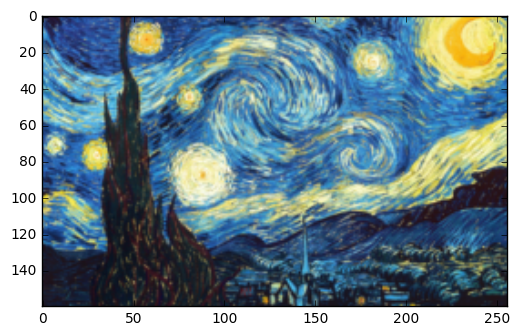

(160, 256, 3)


In [3]:
# Image to train on - The Starry Night by Vincent Van Gogh
starry = misc.imread(name = "starry_small.png")
plt.imshow(starry)
plt.show()
print starry.shape

### Code for building the VGG - 11 layer version
#### Starting interactive TF session
Sessions are connections to the C++ backend where the ***Heavy Lifting*** happens

In [4]:
# Starting with the TF code
sess = tf.InteractiveSession()

In [31]:
photoGraph = tf.placeholder(tf.float32, [160,256,3])
artWork = tf.placeholder(tf.float32, [160,256,3])

#### Functions to intialize weights in the network
Weight initialization for ReLU networks with He.et. al scheme and constant bias initialization

In [6]:
def weight_initialization(shape):
    initial = tf.random_normal(shape=shape, stddev=0.01) * 2/np.sqrt(shape[1] * shape[2] * shape[3])
    return(tf.Variable(initial))

In [25]:
def bias_variable(shape):
    initial = tf.constant(shape=shape,value= 0.1)
    return(tf.Variable(initial))

#### Functions for convolution and Max pooling
1. Convolution function takes in the input and Weight matrix to perform the convolution operation.
2. Max pooling reduces the size of the input to reduce network parameters along with reducing local variance of the image. Otherwise images become replicates for each other

In [8]:
# Convolution with same padding
def conv2d(x,W):
    return(tf.nn.conv2d(x,W,strides = [1,1,1,1],padding='SAME'))

# 2x2 pooling
def max_pool2d(x):

    return(tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,1,1,1],padding='SAME'))

### Using the VGG network with combined content and style loss functions
Using an 11 layer VGG network - Has 8 convolutional layers. All layers individually defined for computation of Gram Matrix

In [36]:
# Reshaping image for 4d convolution function
photoGraph_input = tf.reshape(photoGraph,[-1,160,256,3])

#### Defining the forward pass mechanism for the VGG net

In [38]:
# Convolution layer 1. Has one convolution (3-64) and one pooling
W1 = weight_initialization(shape=[3,3,3,64])
b1 = bias_variable([64])

h_conv1 = tf.nn.relu(conv2d(photoGraph_input, W1) + b1)
h_pool1 = max_pool2d(h_conv1)

In [42]:
# Convolution layer 2. Has one convolution (3-128) and one pooling
W2 = weight_initialization(shape=[3,3,64,128])
b2 = bias_variable([128])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W2) + b2)
h_pool2 = max_pool2d(h_conv2)

In [44]:
# Convolution layer 3. Has 2 convolution (3-256) and one pooling
W3 = weight_initialization(shape = [3,3,128,256])
b3 = bias_variable([256])

W4 = weight_initialization(shape = [3,3,256,256])
b4 = bias_variable([256])

h_conv3 = tf.nn.relu(conv2d(h_pool2, W3) + b3)
h_conv4 = tf.nn.relu(conv2d(h_conv3, W4) + b4)
h_pool3 = max_pool2d(h_conv4)

In [46]:
# Convolution layer 4. Has 2 convolution (3-512) and one pooling

W5 = weight_initialization(shape = [3,3,256,512])
b5 = bias_variable([512])

W6 = weight_initialization(shape = [3,3,512,512])
b6 = bias_variable([512])

h_conv5 = tf.nn.relu(conv2d(h_pool3, W5) + b5)
h_conv6 = tf.nn.relu(conv2d(h_conv5, W6) + b6)
h_pool4 = max_pool2d(h_conv6)

In [47]:
# Convolution layer 5. Has 2 convolution (3-512) and one pooling (copy of layer 4)

W7 = weight_initialization(shape = [3,3,512,512])
b7 = bias_variable([512])

W8 = weight_initialization(shape = [3,3,512,512])
b8 = bias_variable([512])

h_conv7 = tf.nn.relu(conv2d(h_pool4, W7) + b7)
h_conv8 = tf.nn.relu(conv2d(h_conv7, W8) + b8)
h_pool5 = max_pool2d(h_conv8)

#### Defining the training method for the DCNN